# 异常消费行为检测

In [1]:
#数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task1_data.csv')
data.head()

,frequency,payment
0,5.00035,197.922
1,5.10001,197.953
2,5.10027,194.836
3,4.96781,189.600
4,4.80171,189.549


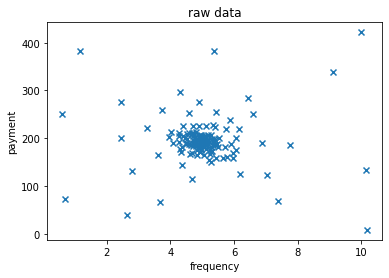

In [2]:
#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.show()

In [3]:
#x1 x2 X赋值
X = data
x1 = data.loc[:,'frequency']
x2 = data.loc[:,'payment']
X.head()
x1.head()
x2.head()

0    197.922
1    197.953
2    194.836
3    189.600
4    189.549
Name: payment, dtype: float64

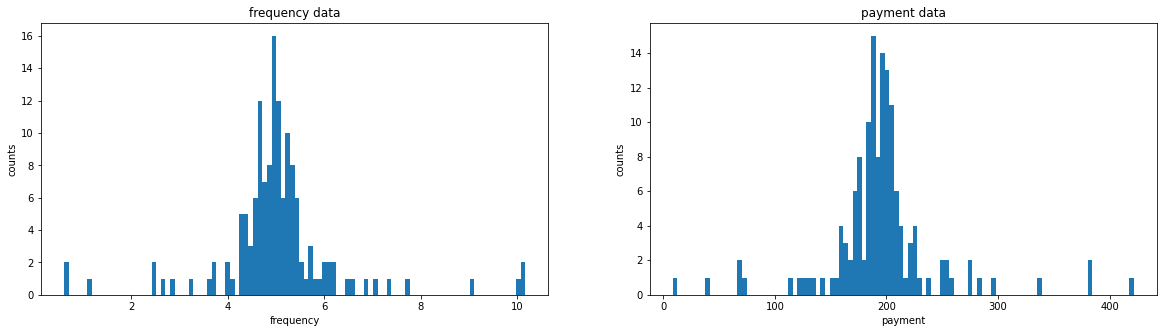

In [4]:
#数据分布的可视化操作
fig2 = plt.figure(figsize=(20,5))
fig2_1 = plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('frequency data')
plt.xlabel('frequency')
plt.ylabel('counts')

fig2_2 = plt.subplot(122)
plt.hist(x2,bins=100)
plt.title('payment data')
plt.xlabel('payment')
plt.ylabel('counts')
plt.show()

In [5]:
#计算平均值u，以及标准差sigma
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

5.033123443661971 1.2756307632971424 194.815448943662 50.42404624918217


In [6]:
#计算基于高斯分布的概率密度函数
from scipy.stats import norm
x1_range = np.linspace(0,10,300)
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,400,300)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)
# print(x1_range,x1_range.shape)
print(x1_normal,x1_normal.shape)

[1.30225551e-04 1.44368766e-04 1.59938035e-04 1.77064595e-04
 1.95890410e-04 2.16568898e-04 2.39265712e-04 2.64159547e-04
 2.91442997e-04 3.21323438e-04 3.54023958e-04 3.89784323e-04
 4.28861983e-04 4.71533116e-04 5.18093705e-04 5.68860659e-04
 6.24172961e-04 6.84392859e-04 7.49907082e-04 8.21128088e-04
 8.98495339e-04 9.82476601e-04 1.07356927e-03 1.17230169e-03
 1.27923456e-03 1.39496220e-03 1.52011401e-03 1.65535580e-03
 1.80139110e-03 1.95896257e-03 2.12885328e-03 2.31188800e-03
 2.50893447e-03 2.72090459e-03 2.94875557e-03 3.19349105e-03
 3.45616207e-03 3.73786803e-03 4.03975749e-03 4.36302893e-03
 4.70893134e-03 5.07876469e-03 5.47388024e-03 5.89568075e-03
 6.34562046e-03 6.82520491e-03 7.33599056e-03 7.87958419e-03
 8.45764211e-03 9.07186909e-03 9.72401707e-03 1.04158836e-02
 1.11493100e-02 1.19261792e-02 1.27484134e-02 1.36179712e-02
 1.45368448e-02 1.55070562e-02 1.65306541e-02 1.76097091e-02
 1.87463099e-02 1.99425583e-02 2.12005640e-02 2.25224395e-02
 2.39102935e-02 2.536622

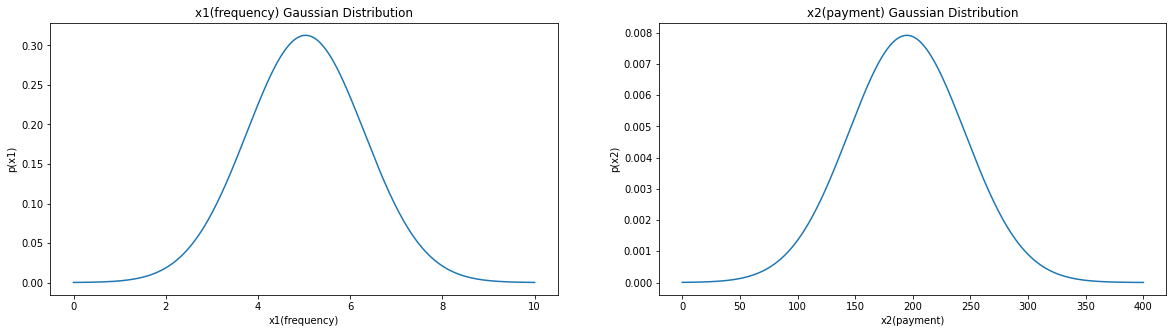

In [7]:
#原始数据的高斯分布概率密度函数可视化
fig3 = plt.figure(figsize=(20,5))
fig3_1 = plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('x1(frequency) Gaussian Distribution')
plt.xlabel('x1(frequency)')
plt.ylabel('p(x1)')

fig3_2 = plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('x2(payment) Gaussian Distribution')
plt.xlabel('x2(payment)')
plt.ylabel('p(x2)')
plt.show()

In [8]:
import math
#设置范围
x_min, x_max = 0, 10
y_min, y_max = 0, 400
h1 = 0.1
h2 = 0.1
#生成矩阵数据
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))
print(xx.shape,yy.shape)

#展开矩阵数据
x_range = np.c_[xx.ravel(), yy.ravel()]
x1 = np.c_[xx.ravel()]
x2 = np.c_[yy.ravel()]
x_range_df = pd.DataFrame(x_range)
#x_range_df.to_csv('data.csv')
#高斯分布参数
u1 = x1_mean
u2 = x2_mean
sigma1 = x1_sigma
sigma2 = x2_sigma

#计算高斯分布概率
p1 = 1/sigma1/math.sqrt(2*math.pi)*np.exp(-np.power((x1-u1),2)/2/math.pow(sigma1,2))
p2 = 1/sigma2/math.sqrt(2*math.pi)*np.exp(-np.power((x2-u2),2)/2/math.pow(sigma2,2))
p = np.multiply(p1,p2)

(4000, 100) (4000, 100)


In [ ]:
#对概率密度维度转化
p_2d = p.reshape(xx.shape[0],xx.shape[1])

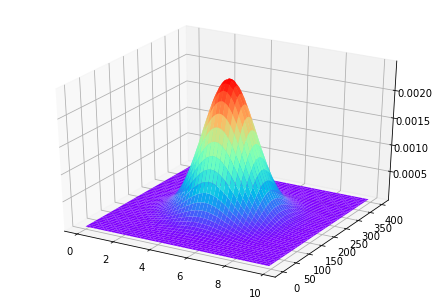

In [9]:
#综合高斯分布概率密度函数的可视化
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
fig5 = plt.figure()
axes3d = Axes3D(fig5)
axes3d.plot_surface(xx,yy,p_2d,cmap=cm.rainbow)

In [10]:
#建立异常检测模型
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=0.03)
model.fit(X)

EllipticEnvelope(contamination=0.03)

In [11]:
#模型预测
y_predict = model.predict(X)
print(y_predict)
print(pd.value_counts(y_predict))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 1    137
-1      5
dtype: int64


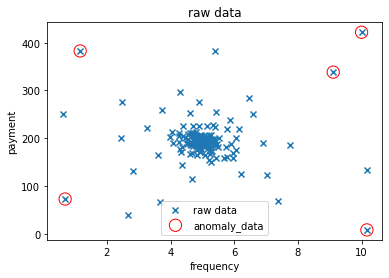

In [12]:
fig6 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',label='raw data')
plt.scatter(data.loc[:,'frequency'][y_predict==-1],data.loc[:,'payment'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150,label='anomaly_data')

plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend()
plt.show()

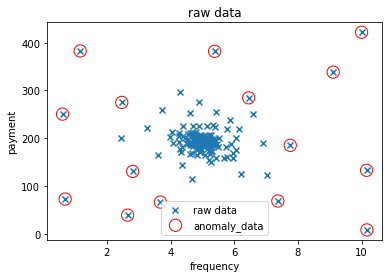

In [13]:
model = EllipticEnvelope(contamination=0.1)
model.fit(X)
#模型预测
y_predict = model.predict(X)
fig6 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',label='raw data')
plt.scatter(data.loc[:,'frequency'][y_predict==-1],data.loc[:,'payment'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150,label='anomaly_data')

plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend()
plt.show()

In [10]:
model = EllipticEnvelope(contamination=0.2)
model.fit(X)
#模型预测
y_predict = model.predict(X)
fig6 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',label='raw data')
plt.scatter(data.loc[:,'frequency'][y_predict==-1],data.loc[:,'payment'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150,label='anomaly_data')

plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend()
plt.show()

NameError: name 'EllipticEnvelope' is not defined

In [9]:
fig6.add_subplot(fig5)

NameError: name 'fig6' is not defined

![materials](materials2.png)